## Cost of Living vs. GDP (by Country)

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install sklearn
#!pip install seaborn

#### load the data and know the features

In [182]:
# import urllib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data = urllib.request.urlopen('https://www.oecd-ilibrary.org/economics/data/oecd-stat/data-warehouse_data-00900-en')
data = "datasets/GDP_2016_2020.csv" # Represents most recent data for each country, some countries report data more regularly

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
raw_df = pd.read_csv(data)

raw_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,2016,50237.794429,NaN
1,AUS,GDP,TOT,USD_CAP,A,2017,50853.615427,NaN
2,AUS,GDP,TOT,USD_CAP,A,2018,53061.634053,NaN
3,AUS,GDP,TOT,USD_CAP,A,2019,53067.877181,E
4,AUT,GDP,TOT,USD_CAP,A,2016,52665.087457,NaN


In [183]:
# df.loc[df['TIME'] > 2016, ['LOCATION','TIME','Value']]
df = raw_df.copy().sort_values(by='TIME', ascending=False)
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
99,POL,GDP,TOT,USD_CAP,A,2020,33356.123878,NaN
13,BEL,GDP,TOT,USD_CAP,A,2020,51688.583464,P
32,FIN,GDP,TOT,USD_CAP,A,2020,50176.937881,NaN
27,DNK,GDP,TOT,USD_CAP,A,2020,59346.890596,NaN
166,SVN,GDP,TOT,USD_CAP,A,2020,38727.415299,NaN
...,...,...,...,...,...,...,...,...
132,USA,GDP,TOT,USD_CAP,A,2016,58000.888034,NaN
128,GBR,GDP,TOT,USD_CAP,A,2016,44125.534988,NaN
120,CHE,GDP,TOT,USD_CAP,A,2016,68105.138178,NaN
115,SWE,GDP,TOT,USD_CAP,A,2016,50430.174559,NaN


In [184]:
# From the sorted data, drop the reported values for each country except the most recent report.
df = df.drop_duplicates(subset=['LOCATION'], keep='first')
df = df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY'])
df

,LOCATION,INDICATOR,MEASURE,TIME,Value
99,POL,GDP,USD_CAP,2020,33356.123878
13,BEL,GDP,USD_CAP,2020,51688.583464
32,FIN,GDP,USD_CAP,2020,50176.937881
27,DNK,GDP,USD_CAP,2020,59346.890596
166,SVN,GDP,USD_CAP,2020,38727.415299
...,...,...,...,...,...
232,MKD,GDP,USD_CAP,2018,16725.791726
168,ZAF,GDP,USD_CAP,2017,12810.965544
141,CHN,GDP,USD_CAP,2017,14306.396116
153,IDN,GDP,USD_CAP,2017,11050.882373


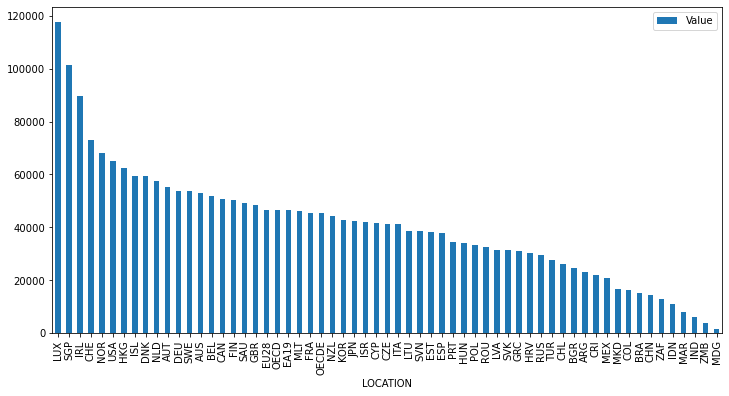

In [185]:
df=df.sort_values(by='Value', ascending=False)
df[['LOCATION','Value']].plot(kind='bar', x='LOCATION', figsize=(12,6))
plt.show()

## Get Country names from Country Code

In [186]:
# Fetch country code from website.
codes_df = pd.read_html('https://laendercode.net/en/3-letter-list.html')[0]
codes_df.head()

,ISO 3166 ALPHA-3,Country
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa


In [187]:
# Join the sorted data on the Country code, to get appropriate country name
merged_df = df.merge(codes_df, left_on=['LOCATION'], right_on=['ISO 3166 ALPHA-3'])
merged_df.head()

,LOCATION,INDICATOR,MEASURE,TIME,Value,ISO 3166 ALPHA-3,Country
0,LUX,GDP,USD_CAP,2020,117619.647997,LUX,Luxembourg
1,SGP,GDP,USD_CAP,2018,101280.413499,SGP,Singapore
2,IRL,GDP,USD_CAP,2019,89561.458769,IRL,Ireland
3,CHE,GDP,USD_CAP,2019,73114.493516,CHE,Switzerland
4,NOR,GDP,USD_CAP,2020,68117.123175,NOR,Norway


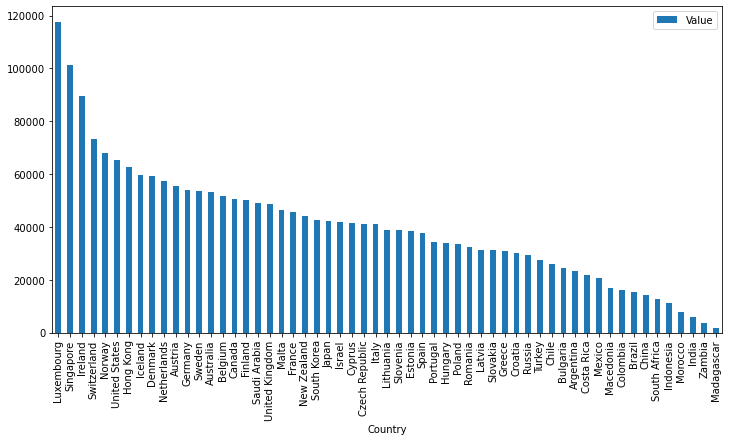

In [188]:
# Plot data with country names
merged_df[['Country','Value']].plot(kind='bar', x='Country', figsize=(12,6))
plt.show()

In [189]:
col_df = pd.read_html('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2021&displayColumn=0')[1]
col_df

,Rank,Country,Cost of Living Index
0,NaN,Bermuda,145.07
1,NaN,Switzerland,131.75
2,NaN,Norway,106.09
3,NaN,Iceland,96.77
4,NaN,Denmark,91.67
...,...,...,...
133,NaN,Afghanistan,26.33
134,NaN,India,25.16
135,NaN,Kyrgyzstan,22.98
136,NaN,Libya,22.32


In [190]:
merged_df = merged_df.merge(col_df, left_on=['Country'], right_on=['Country'])
merged_df.head()

,LOCATION,INDICATOR,MEASURE,TIME,Value,ISO 3166 ALPHA-3,Country,Rank,Cost of Living Index
0,LUX,GDP,USD_CAP,2020,117619.647997,LUX,Luxembourg,NaN,88.28
1,SGP,GDP,USD_CAP,2018,101280.413499,SGP,Singapore,NaN,85.59
2,IRL,GDP,USD_CAP,2019,89561.458769,IRL,Ireland,NaN,83.11
3,CHE,GDP,USD_CAP,2019,73114.493516,CHE,Switzerland,NaN,131.75
4,NOR,GDP,USD_CAP,2020,68117.123175,NOR,Norway,NaN,106.09


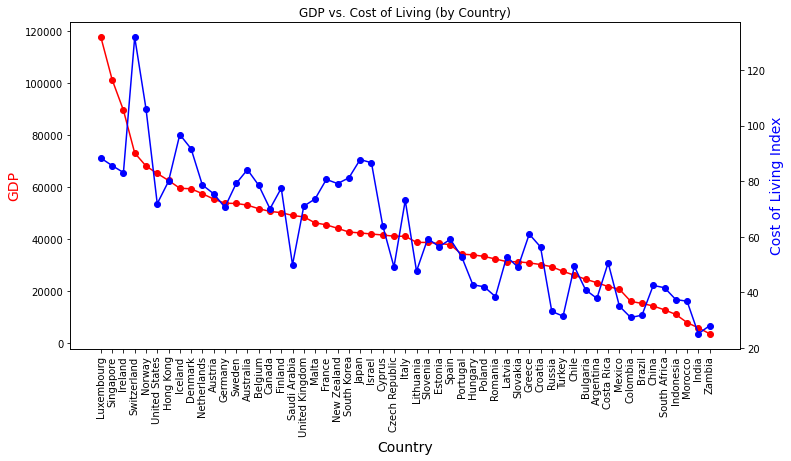

In [206]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12,6))
# make a plot
ax.plot(merged_df['Country'], merged_df['Value'], color="red", marker="o")
# set x-axis label
ax.set_xlabel('Country', fontsize=14)
# set y-axis label
ax.set_ylabel("GDP",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merged_df['Country'], merged_df['Cost of Living Index'], color="blue", marker="o")
ax2.set_ylabel("Cost of Living Index", color="blue", fontsize=14)
ax.set_title('GDP vs. Cost of Living (by Country)')
ax.tick_params(axis='x', labelrotation = 90)
plt.show()